In [1]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
#%%Initialisations
#total number of bandit arms
n = 10

#total number of experiments
t = 1000

#probability of random exploration(fraction)
upper_bound = []
upper_bound = [2.0,0.1,0]
distributions = ['UCB','epsilon','oiv']

#number of bandits(episodes)
bandit_number = 2000


#optimal action that should be chosen for each bandit
a_opt = np.zeros((bandit_number,n))

#initial same values to all the arms
Q_star = np.random.normal(loc=0,scale=1,size=(bandit_number,n))

#cumulative reward at each episode for chossing an action by probability epsilon
avg_reward = np.asmatrix(np.zeros((len(upper_bound),t)))
avg_reward_ns = np.asmatrix(np.zeros((len(upper_bound),t)))

#function Bandit taking action and bandit as input, returning reward.
def bandit(a,ids):
    R = np.random.normal(loc=Q_star[ids,a],scale=1,size=1)
    return R

def bandit_ns(a,ids):
    R_ns = np.random.normal(loc = Q_star_ns[ids,a],scale = 1,size = 1)
    return R_ns

In [ ]:
#%%A simple bandit algorithm:crappy cleaning
upper_bound = []
upper_bound = [2.0,0.1,0]
distributions = ['UCB','epsilon','oiv']
Q_oiv = np.full((bandit_number,n),5.0)
for c in range(2):
    for k in range(len(upper_bound)):
        N = np.zeros((bandit_number,n))
        Q = np.zeros((bandit_number,n))
        if (distributions[k] == 'oiv'):
            Q = Q_oiv.copy()
        else:
            Q = Q.copy()
        Q_star_ns = np.asarray(np.zeros((bandit_number,n)))
        for j in range(n):
            init_value = np.random.normal(loc = 0, scale = 1)
            Q_star_ns[:,j] = np.asarray([[init_value for row in range(bandit_number)] ])

        for episode in range(1, t):
            local_reward = 0.0
            action_history = 0.0
            local_reward_ns = 0.0
            for machine in range(1,bandit_number):
                if (distributions[k] == 'UCB'):
                    c1 = 2.0
                    a = np.argmax(Q[machine,:] + c1*(np.sqrt(math.log(episode+1))/(N[machine,:]+1)))
                elif ((distributions[k] == 'epsilon') or (distributions[k] == 'oiv')):
                    p = np.random.rand()
                    epsilon = upper_bound[k]
                    if (p <= epsilon):
                        a = np.random.randint(1,high = n)
                    else:
                        a = np.argmax(Q[machine,:])
                        
                if (c == 0): #stationary case
                    rewards = bandit(a,machine)
                    N[machine,a] = N[machine,a] + 1
                    #Q[machine,a] = Q[machine,a] + 0.1*(rewards-Q[machine,a])
                    Q[machine,a] = Q[machine,a] + (1/N[machine,a])*(rewards-Q[machine,a])
                    local_reward += rewards
                else: #non-stationary case
                    rewards_ns = bandit_ns(a,machine)
                    N[machine,a] = N[machine,a] + 1
                    #Q[machine,a] = Q[machine,a] + 0.1*(rewards-Q[machine,a])
                    Q[machine,a] = Q[machine,a] + (1/N[machine,a])*(rewards-Q[machine,a])
                    local_reward_ns += rewards_ns

            if (c == 1):
                Q_star_ns += np.random.normal(loc = 0, scale = 0.01, size = (bandit_number,n))
                avg_reward_ns[k,episode] = (local_reward_ns/bandit_number)
            else:
                avg_reward[k,episode] = (local_reward/bandit_number)

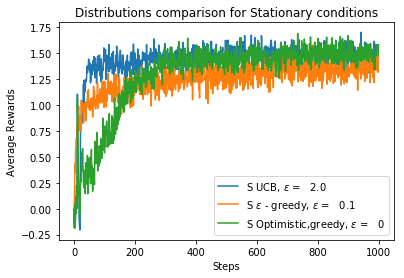

In [17]:
#%%plot graphs for average rewards
distribution = ['UCB,','$\epsilon$ - greedy,','Optimistic,greedy,']
for reward in range(len(upper_bound)):
    plt.plot(avg_reward[reward,:].T,label = str(distribution[reward]) + ' $\epsilon$ =   ' + str(upper_bound[reward]))
    plt.xlabel('Steps')
    plt.ylabel('Average Rewards')
    plt.legend()
    plt.title('Distributions comparison for Stationary conditions')

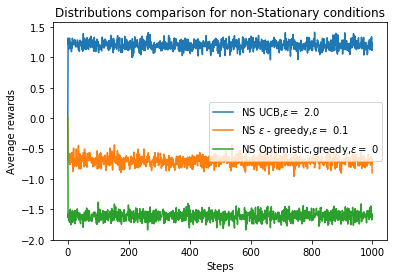

In [18]:
#%%non-stationary cases reward distribution
for reward_1 in range(len(upper_bound)):
    plt.plot(avg_reward_ns[reward_1,:].T,label = str(distribution[reward_1]) + '$\epsilon =  $ ' + str(upper_bound[reward_1]))
    plt.xlabel('Steps')
    plt.ylabel('Average rewards')
    plt.legend()
    plt.title('Distributions comparison for non-Stationary conditions')